In [1]:
import numpy as np
import pandas as pd

import networkx as nx
from networkx.algorithms import bipartite

Use NetworkX to construct the bipartite weighted graph projection of nodes A,B,C,D,E,F and find  the weight of the edge (A,C).

What is the weight of the edge (A,C)?

In [2]:
B = nx.Graph()
B.add_edges_from([('A', 'G'),('A','I'), ('B','H'), ('C', 'G'), ('C', 'I'),('D', 'H'), ('E', 'I'), ('F', 'G'), ('F', 'J')])
X1 = set(['A', 'B', 'C', 'D', 'E', 'F'])

P = bipartite.weighted_projected_graph(B,X1);

In [3]:
P.edges(data=True)

EdgeDataView([('A', 'E', {'weight': 1}), ('A', 'C', {'weight': 2}), ('A', 'F', {'weight': 1}), ('E', 'C', {'weight': 1}), ('D', 'B', {'weight': 1}), ('C', 'F', {'weight': 1})])

# LEARNING DIFFERENT WAYS TO LOAD / CREATE NETWORKS

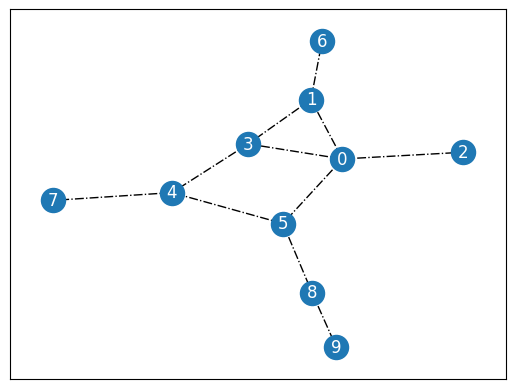

In [4]:
# Instantiate the graph
g = nx.Graph()
# add node/edge pairs
g.add_edges_from([ (0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network g
nx.draw_networkx(g, font_color="white", style="-.");

## CONCEPT: Adjacent List

Get the adjency list of g; in other words, the next neighbours list per node.

In [5]:
nx.write_adjlist(g, "g_adjlist.txt")

In [6]:
! ls

g_adjlist.txt		      NetworkNotes.pdf
g_given_example_edgelist.txt  networkx_notes.ipynb


In [7]:
! cat g_adjlist.txt 

#/home/kchinas/mdanalysis_env/lib/python3.12/site-packages/ipykernel_launcher.py --f=/home/kchinas/.local/share/jupyter/runtime/kernel-v3bbb7d4c48f10d1dcf4d265f3d395daa194f2b4bc.json
# GMT Tue Feb  4 15:58:28 2025
# 
0 1 2 3 5
1 3 6
2
3 4
5 4 8
6
4 7
7
8 9
9


In [8]:
# It is possible to read a graph from its adjacent list alone
g2 = nx.read_adjlist('g_adjlist.txt', nodetype=int)
g2.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (5, 4), (5, 8), (4, 7), (8, 9)])

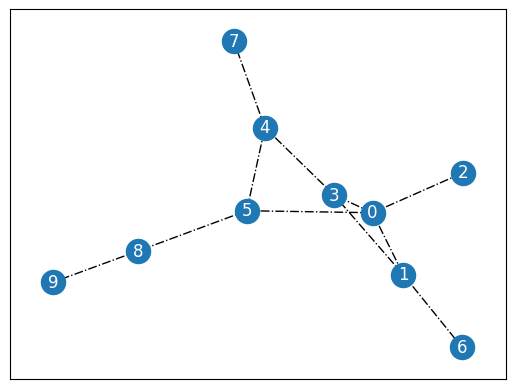

In [9]:
nx.draw_networkx(g2, font_color="white", style="-.");

## CONCEPT: Adjacency Matrix

The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row 0, column 1 corresponds to the edge between node 0 and node 1.

z.B:

In [10]:
g3_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
               [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
               [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
               [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

Reading across row `0`, there is a '`1`' in columns `1`, `2`, `3`, and `5`, which indicates that node `0` is adjacent to nodes 1, 2, 3, and 5

In [11]:
g3 = nx.Graph(g3_mat)
g3.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 6), (3, 4), (4, 5), (4, 7), (5, 8), (8, 9)])

In [12]:
g2.edges() == g.edges(), g3.edges() == g.edges()

(True, True)

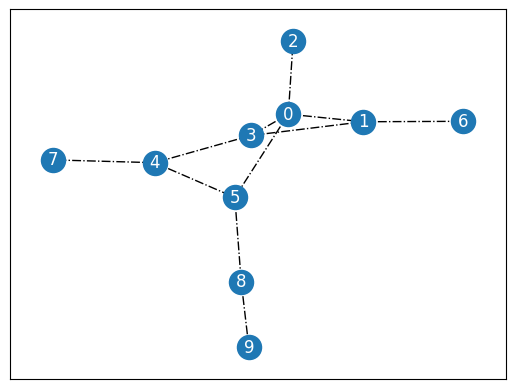

In [13]:
nx.draw_networkx(g3, font_color="white", style="-.");

## CONCEPT: Edgelist

The edge list format represents edge pairings in the first two columns. Additional edge attributes can be added in subsequent columns, for instance, weight:

In [14]:
! cat g_given_example_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1

In [15]:
g4 = nx.read_edgelist('g_given_example_edgelist.txt', data=[('Weight', int)])
g4.edges(data=True)

EdgeDataView([('0', '1', {'Weight': 4}), ('0', '2', {'Weight': 3}), ('0', '3', {'Weight': 2}), ('0', '5', {'Weight': 6}), ('1', '3', {'Weight': 2}), ('1', '6', {'Weight': 5}), ('3', '4', {'Weight': 3}), ('5', '4', {'Weight': 1}), ('5', '8', {'Weight': 6}), ('4', '7', {'Weight': 2}), ('8', '9', {'Weight': 1})])

### It is not the same to display the attributes when existing in a network:

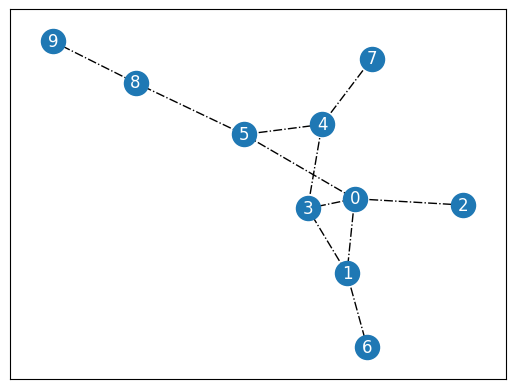

In [16]:
nx.draw_networkx(g4, font_color="white", style="-.", with_labels=True);

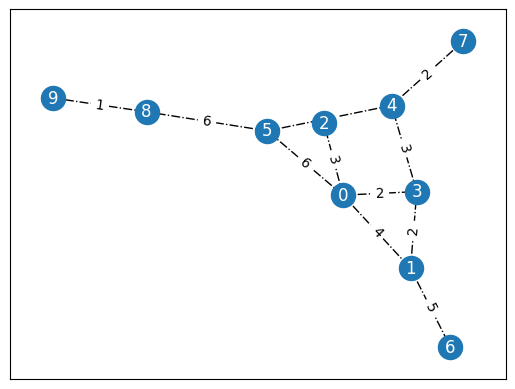

In [17]:
pos = nx.spring_layout(g4)
nx.draw_networkx(g4, pos, with_labels=True, style="-.", font_color="white")
edge_labels = nx.get_edge_attributes(g4, "Weight")  # Extract the "Weight" attribute
nx.draw_networkx_edge_labels(g4, pos, edge_labels=edge_labels);

Consider the following network, if we wanted to block the message from `H` to `O` by removing the the smallest possible number of edges from the network, which edges should we remove? 



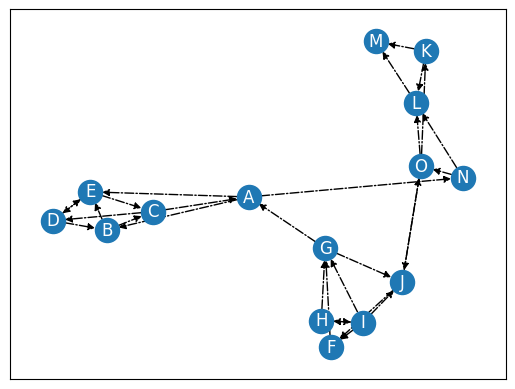

In [18]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), ('G', 'A'), ('A', 'N'), ('B', 'C'), ('D', 'B'), ('B', 'E'), ('C', 'D'), ('E', 'C'), ('D', 'E'), ('E', 'D'), ('F', 'G'), ('I', 'F'), ('J', 'F'), ('H', 'G'), ('I', 'G'), ('G', 'J'), ('I', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'O'), ('O', 'J'), ('K', 'M'), ('K', 'L'), ('O', 'K'), ('O', 'L'), ('N', 'L'), ('L', 'M'), ('N', 'O')])
nx.draw_networkx(G, font_color="white", style="-.", with_labels=True);

In [19]:
nx.minimum_edge_cut(G,"H","O")

{('J', 'O'), ('N', 'O')}